# TensorFlow Datasets

## Instalación de tf.datasets

Antes de comenzar, aprenderemos un poco sobre cómo obtener conjuntos de datos con la librería TFDS (TensorFlow Datasets).

Puedes consultar la documentación oficial [aquí](https://www.tensorflow.org/datasets/overview)

TFDS existe en dos paquetes:

- `pip install tensorflow-datasets`: la versión estable, lanzada cada pocos meses.
- `pip install tfds-nightly`: Lanzado todos los días, contiene las últimas versiones de los conjuntos de datos.

Este notebook usa tfds-nightly:

In [ ]:
# Esto es solo para Colab
# !pip install -q tfds-nightly

In [1]:
import matplotlib as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

## Conjuntos de datos disponibles

Todos los creadores de conjuntos de datos son subclase de `tfds.core.DatasetBuilder`. Para obtener la lista de constructores disponibles, use `tfds.list_builders()`

In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

## Cargar un conjunto de datos

### tfds.load

La forma más sencilla de cargar un conjunto de datos es tfds.load. Va a:
1. Descargar los datos y guardarlos como archivos `tfrecord`.
2. Cargar el `tfrecord` y crear el `tf.data.Dataset`.

In [2]:
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
<_OptionsDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


- `split=`: Qué división leer (por ejemplo `'train'`, `['train', 'test']`, `train[80%]`, ...).
- `shuffle_files=`: Controla si mezclar los archivos entre cada época (TFDS almacena grandes conjuntos de datos en varios archivos más pequeños).
- `data_dir=`: Ubicación donde se guarda el conjunto de datos (por defecto es `~/tensorflow_datasets/`).
- `with_info=True`: Devuelve el `tfds.core.DatasetInfo` contiene los metadatos del conjunto de datos.
- `download=False`: deshabilitar la descarga.

### tfds.builder

Una alternativa a utilizar tdfs.load es utilizar la API tfds.core.DatasetBuilder:

In [3]:
builder = tfds.builder('mnist')
# 1. Create the tfrecord files (no-op if already exists)
builder.download_and_prepare()
# 2. Load the `tf.data.Dataset`
ds = builder.as_dataset(split='train', shuffle_files=True)
print(ds)

<_OptionsDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


## Iterar sobre el conjunto de datos

### Como diccionario

Por defecto, el objeto `tf.data.Dataset` contiene un `diccionario` de `tf.Tensor`

In [ ]:
d = { 'image': 1, 'label': 2}
d['label']

2

In [16]:
ds = tfds.load('mnist', split='train')
ds = ds.take(1)  # Only take a single example

for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  image = example["image"]
  label = example["label"]
  print(image.shape, label)

['image', 'label']
(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


### Como una tupla (as_supervised=True)

Utilizando `as_supervised=True`, puedes obtener una tupla `(features, label)` para datasets supervisados.

In [ ]:
ds = tfds.load('mnist', split='train', as_supervised=True)
ds = ds.take(1)

for image, label in ds:  # example is (image, label)
  print(image.shape, label)

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


### Como numpy (tfds.as_numpy)

In [ ]:
ds = tfds.load('mnist', split='train', as_supervised=True)
ds = ds.take(1)

for image, label in tfds.as_numpy(ds):
  print(type(image), type(label), label)

<class 'numpy.ndarray'> <class 'numpy.int64'> 4


### Como batched tf.Tensor (batch_size=-1)

In [6]:
image, label = tfds.as_numpy(tfds.load(
    'mnist',
    split='test',
    batch_size=-1,
    as_supervised=True,
))

print(type(image), image.shape)

<class 'numpy.ndarray'> (10000, 28, 28, 1)


Asegúrate de que tu dataset quepa en memoria, y que todos los ejemplos tengan la misma forma.

## Visualización

### tfds.as_dataframe

Los objetos `tf.data.Dataset` pueden ser convertidos a `pandas.DataFrame` con `tfds.as_dataframe` para ser visualizados en un notebook, por ejemplo.

- Añade `tfds.core.DatasetInfo` como segundo argumento de `tfds.as_dataframe` para visualizar imágenes, audios, textos, videos, ...
- Utiliza `ds.take(x)` para mostrar únicamente los primeros `x` ejemplos. `pandas.DataFrame` cargará todo el dataset en memoria y podría ser difícil de mostrar.

In [ ]:
ds, info = tfds.load('mnist', split='train', with_info=True)

dfpd = tfds.as_dataframe(ds.take(4))
type(dfpd.head())
dfpd.head()

image  label
0  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      4
1  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      1
2  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      0
3  [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...      7

### tfds.show_examples

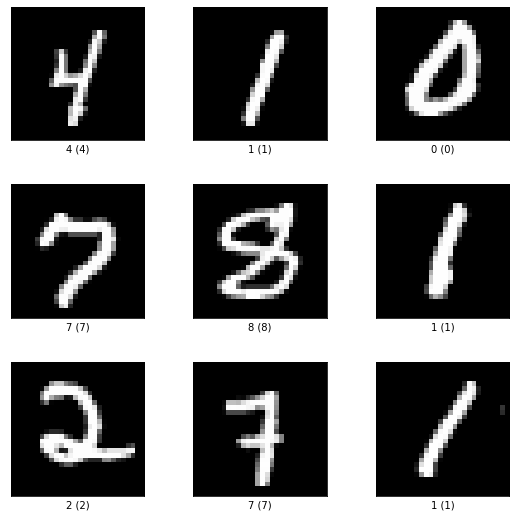

In [ ]:
ds, info = tfds.load('mnist', split='train', with_info=True)

fig = tfds.show_examples(ds, info)

# Acceder a los metadatos de un conjunto de datos

Todos los constructores incluyen un objeto `tfds.core.DatasetInfo` que contiene el conjunto de datos de metadatos.

Se puede acceder a través de:
- La API `tfds.load`:

In [10]:
ds, info = tfds.load('mnist', with_info=True)

- O la API `tfds.core.DatasetBuilder`:

In [11]:
builder = tfds.builder('mnist')
info = builder.info

La información del conjunto de datos contiene información adicional sobre el conjunto de datos (versión, cita, página de inicio, descripción, ...).

In [12]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



# Incluir metadatos (nombres de etiquetas, forma de la imagen, ...)

Se puede acceder mediante `tfds.features.FeatureDict`:

In [ ]:
info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

## Número de clases, nombres de etiquetas

In [15]:
print(info.features["label"].num_classes)
print(info.features["label"].names)
print(info.features["label"].int2str(7))  # Human readable version (8 -> 'cat')
print(info.features["label"].str2int('7'))

10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
7
7


## Shapes y dtypes

In [ ]:
print(info.features.shape)
print(info.features.dtype)
print(info.features['image'].shape)
print(info.features['image'].dtype)

{'image': (28, 28, 1), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}
(28, 28, 1)
<dtype: 'uint8'>


# Splits metadata (por ejemplo, nombres de los splits, número de ejemplos, ...)

Se puede acceder mediante `tfds.core.SplitDict`:

In [ ]:
print(info.splits)

{'train': <SplitInfo num_examples=60000, num_shards=1>, 'test': <SplitInfo num_examples=10000, num_shards=1>}


## Divisiones disponibles:

In [ ]:
print(list(info.splits.keys()))

['train', 'test']


## Obtenga información sobre la división individual:

In [ ]:
print(info.splits['train'].num_examples)
print(info.splits['train'].filenames)
print(info.splits['train'].num_shards)

60000
['mnist-train.tfrecord-00000-of-00001']
1


También funciona con la API subsplit:

In [ ]:
print(info.splits['train[15%:75%]'].num_examples)
print(info.splits['train[15%:75%]'].file_instructions)

36000
[FileInstruction(filename='mnist-train.tfrecord-00000-of-00001', skip=9000, take=36000, num_examples=36000)]


## Descargar los datasets manualmente

Si algo falla y no puede descargar los datos con `tf.datasets`, siempre puede consultar las URL de descarga directa en este [catálogo](https://www.tensorflow.org/datasets/catalog/overview).